In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
sn.set()

In [38]:
data = pd.read_csv(r"C:\Users\rpj20\jupyter baba\nuvlear\POT_GAMMA.csv")

In [39]:
print(data)

    thickness  count  count- bg   errorbar  log(count-bg)  Unnamed: 5  \
0       36.40    126         55  14.035669       4.007333         NaN   
1       34.30    157         86  15.099669       4.454347         NaN   
2       32.20    172        101  15.588457       4.615121         NaN   
3       30.08    170         99  15.524175       4.595120         NaN   
4       27.95    175        104  15.684387       4.644391         NaN   
5       26.05    193        122  16.248077       4.804021         NaN   
6       24.04    185        114  16.000000       4.736198         NaN   
7       21.94    245        174  17.776389       5.159055         NaN   
8       19.84    226        155  17.233688       5.043425         NaN   
9       17.72    243        172  17.720045       5.147494         NaN   
10      15.59    254        183  18.027756       5.209486         NaN   
11      13.68    268        197  18.411953       5.283204         NaN   
12      11.58    284        213  18.841444       5.

## The calculation of half thickness of Lead

In [40]:
x1 = (data['thickness'].values)
y1 = data['count'].values
print("half thickness =  ",x1)
print("Count = ",y1)

half thickness =   [36.4  34.3  32.2  30.08 27.95 26.05 24.04 21.94 19.84 17.72 15.59 13.68
 11.58  9.48  7.38  5.26  3.13  0.  ]
Count =  [126 157 172 170 175 193 185 245 226 243 254 268 284 331 373 359 362 454]


### The above table gives the values of the half thickness (in $gmcm^{-2}$) , also the counts associated with it

In [41]:
y2 = (y1 - 71) # here we subtract the background counts
print(y2)

[ 55  86 101  99 104 122 114 174 155 172 183 197 213 260 302 288 291 383]


In [42]:
yerror = ((y1 + 71)**0.5)/(y2)
print(yerror)

[0.25519398 0.17557755 0.15434116 0.15680985 0.15081141 0.13318096
 0.14035088 0.10216315 0.11118508 0.10302352 0.09851233 0.09346169
 0.08845748 0.07711514 0.06977254 0.07200153 0.0715074  0.05982475]


In [43]:
logy = np.log10(y2)
print(logy)

[1.74036269 1.93449845 2.00432137 1.99563519 2.01703334 2.08635983
 2.05690485 2.24054925 2.1903317  2.23552845 2.26245109 2.29446623
 2.3283796  2.41497335 2.48000694 2.45939249 2.46389299 2.58319877]


In [44]:
import numpy as np
import matplotlib.pyplot as plt

def best_fit(a, b, y_errors):

    a1 = np.sum(a)
    b1 = np.sum(b)
    sab = np.dot(a, b)
    n = len(a)
    sa2 = np.sum(a**2)

    d = (n * sa2 - a1**2)

    m = (n * sab - a1 * b1) / d
    intercept = (sa2 * b1 - a1 * sab) / d

    # Calculate error in slope (m)
    y_fit = m * a + intercept
    residuals = b - y_fit
    variance = np.sum(residuals**2) / (n - 2)
    error_m = np.sqrt(variance * n / d)

    plt.scatter(a, b, color='red', marker='o', label='Data Points')
    x = np.linspace(min(a), max(a))
    y = m * x + intercept
    plt.plot(x, y, color='blue', linestyle='-', linewidth=2, label=f'Best Fit: y = {m:.4f}x + {intercept:.4f}')
    plt.errorbar(a, b, yerr=y_errors, fmt='none')
    plt.xlabel('Mass thickness ($gcm^{-2}$)', color='green')
    plt.ylabel('Log10(N-Nb)', color='green')
    plt.title('Gamma ray absorption', color='purple')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # Add slope error to the plot
    plt.text(
        0.7 * max(a),  # X-coordinate (adjust as needed)
        0.9 * max(b),  # Y-coordinate (adjust as needed)
        f"Slope Error: ±{error_m:.4f}",
        fontsize=10,
        color='black',
        bbox=dict(facecolor='white', alpha=0.7)  # Add a white box around the text
    )

    plt.show()

    print(f"Slope (m): {m:.4f} ± {error_m:.4f}")
    print(f"Intercept (c): {intercept:.4f}")

    return m, error_m, intercept

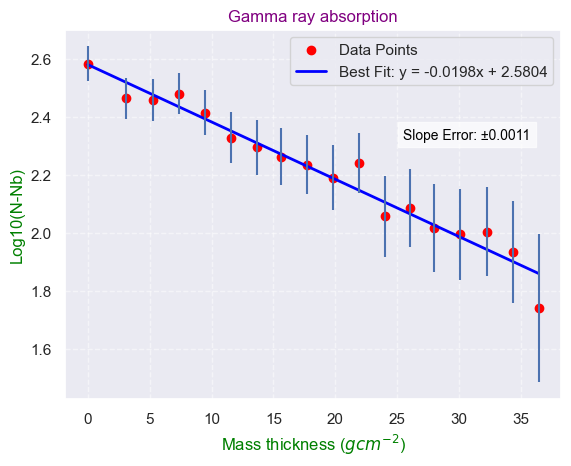

Slope (m): -0.0198 ± 0.0011
Intercept (c): 2.5804


In [45]:
slope , error_slope , y_intercept = best_fit(x1,logy,yerror)

In [46]:
# calculations 

acoeff = 0.693/(2.303*(-slope))

print('half_thickness = ',round(acoeff,3), 'gcm^-2')
thick_error = -acoeff*error_slope/slope
print('error ', thick_error)


half_thickness =  15.214 gcm^-2
error  0.8111082483968425


## Calculations for Iron

In [47]:
x12 = np.array([0,2.28,3.76,4.60,6.08,8.36,9.86,11.41,13.92,15.26,16.20,19.12,23.72,25.29,27.61])
y12 = np.array([449,415,408,409,369,350,352,313,302,315,334,257,221,225,204])

print(len(y12),len(x12))

15 15


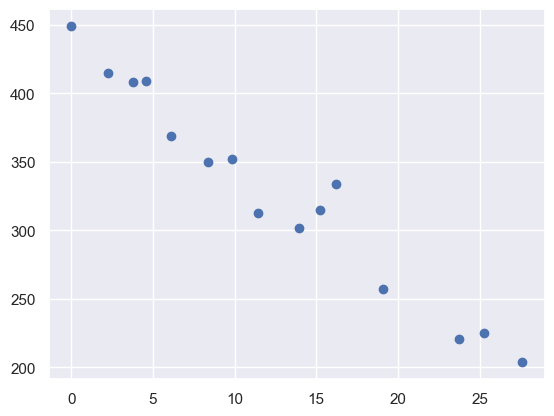

In [16]:
plt.scatter(x12,y12)

In [48]:
y22 = y12 - 80

In [49]:
logy2 = np.log10(y22)
print(logy2)

[2.56702637 2.52504481 2.51587384 2.5171959  2.46089784 2.43136376
 2.4345689  2.36735592 2.34635297 2.37106786 2.40483372 2.24797327
 2.14921911 2.161368   2.09342169]


In [50]:
yerror2 = ((y12 + 80)**0.5)/(y22)

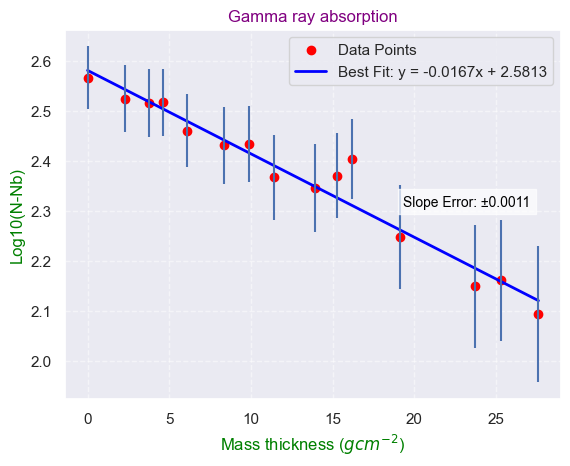

Slope (m): -0.0167 ± 0.0011
Intercept (c): 2.5813


In [20]:
slope2 , error_slope2 , y_intercept2 = best_fit(x12,logy2,yerror2)


In [51]:
mu2 = -2.303*slope2
acoeff2 = 0.693/(2.303*(-slope2))

print('half_thickness = ',round(acoeff2,3), 'gcm^-2')
thick_error2 = -acoeff2*error_slope2/slope2
print('error ', thick_error2)
print('mu = ', mu2)

half_thickness =  21.122 gcm^-2
error  2.90396711863273
mu =  0.03280884283471506


For earlier reading

In [52]:
x72 = np.array([0,2.28,3.76,4.60,6.08,8.36,9.86,11.41,13.92,15.26,16.20,19.12,23.72,25.29,27.61])
y72 = np.array([427,407,438,371,345,339,334,451,294,297,338,280,227,256,210])

print(len(y72),len(x72))

15 15


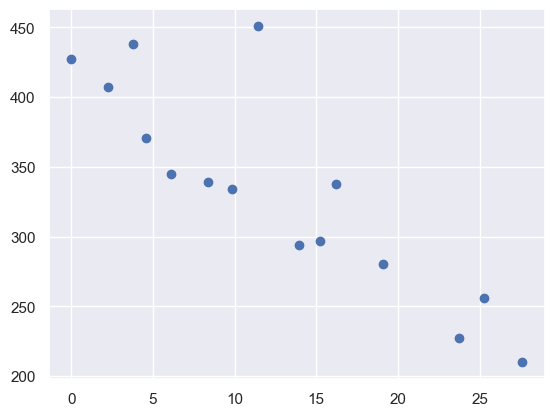

In [53]:
plt.scatter(x72,y72)

In [54]:
y82 = y72 - 80

In [55]:
logy8 = np.log10(y82)
print(logy8)

[2.54032947 2.51454775 2.55388303 2.46389299 2.42324587 2.41329976
 2.40483372 2.56937391 2.33041377 2.33645973 2.41161971 2.30103
 2.16731733 2.24551267 2.11394335]


In [56]:
yerror3 = ((y72 + 80)**0.5)/(y82)

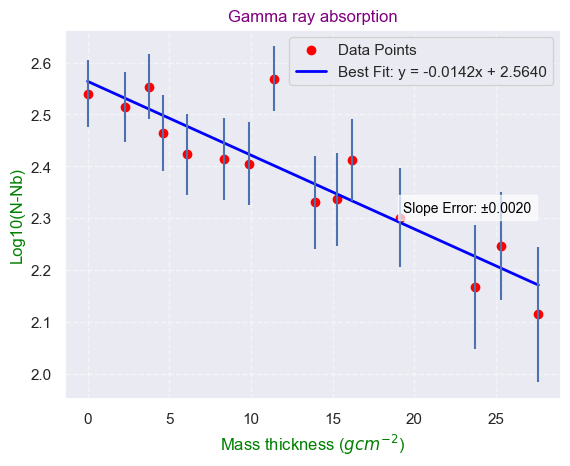

Slope (m): -0.0142 ± 0.0020
Intercept (c): 2.5640


In [57]:
slope2 , error_slope2 , y_intercept2 = best_fit(x72,logy8,yerror3)


In [58]:
mu2 = -2.303*slope2
acoeff2 = 0.693/(2.303*(-slope2))

print('half_thickness = ',round(acoeff2,3), 'gcm^-2')
thick_error2 = -acoeff2*error_slope2/slope2
print('error ', thick_error2)
print('mu = ', mu2)

half_thickness =  21.122 gcm^-2
error  2.90396711863273
mu =  0.03280884283471506


In [59]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
